## Topic 4. Neural Networks
## Perceptron 

In [312]:
# We start by importing the python libraries required to solve the problems

import numpy as np
import matplotlib
from matplotlib import pylab as plt
import matplotlib.patches as mpatches
from scipy.special import expit


We generate  a dataset of points that belong to two classes and are separated by a line. 

Each instance of the dataset has two variables. Classes are: 0 and 1. 

In [278]:
# Points in Class A
xA = 20*np.random.rand(50)
shiftA = 20*np.random.rand(50)
yA = (4+xA)/2.0 - shiftA - 0.1

# Points in Class B
xB = 20*np.random.rand(50)
shiftB = 20*np.random.rand(50)
yB = (4+xB)/2.0 + shiftB + 0.1

# We define our set of observations (the union of points from the two classes)
# We concatenate the vectors
x = np.hstack((xA,xB)).reshape(-1,1)
y = np.hstack((yA,yB)).reshape(-1,1)
x_data = np.hstack((x,y))

# In the vector of target values, the first 50 instances belong to one class and the next 50 instances belong 
# to the other class
target_class = np.vstack((np.zeros((50,1)),np.ones((50,1))))

Function PrintDecisionFunction will be used to visualize the decision functions learned by different ML algorithms.

In [296]:
def PrintDecisionFunction(coefs,intersect,xA,yA,xB,yB,x):

     fsize = 14
     
    # The decision function is computed using the coefficients and intersect learned
     # by the algorithm
     decision_function =  (-intersect -coefs[0]*x)/coefs[1]
        
     fig = plt.figure()
    
     # The decision function is plotted
     plt.plot(x,decision_function,'y*', lw=4)
        
     # The points from the two classes are plotted
     plt.plot(xA, yA, 'ro', lw=4)
     plt.plot(xB, yB, 'bs', lw=4)


     blue_patch = mpatches.Patch(color='blue', label='Class I')
     red_patch = mpatches.Patch(color='red', label='Class II')
     plt.legend(handles=[blue_patch,red_patch])
     plt.xlabel(r'$x$', fontsize=fsize)
     plt.ylabel(r'$y$', fontsize=fsize)

     plt.show()
        
     return fig


## Exercise 1

The  functions included in the following cell implement a perceptron.

1) Complete functions "Make_Predictions" and "Update_Weights".


2) Execute the subsequent cell to visualize how "LearnPerceptron" works.


3) Modify the perceptron algorithm in such a way that it starts from a vector of random weights.


In [315]:
def Init_Weights(nweights):
   weights = np.zeros((1,nweights))  
   return weights


def Make_Predictions(weights,train_data):

   return predictions



def  Update_Weights(w,data,differences,lrate): 

    
   return new_weights
 
    

def LearnPerceptron(train_data, train_class, learning_rate, number_epochs):

   # Number of instances in the dataset
   N = train_data.shape[0]  
  
   # We enlarge the dataset adding a column of ones
   enlarged_train_data = np.hstack((train_data,np.ones((N,1))))
   
   # Number of variables plus the bias 
   n = enlarged_train_data.shape[1]  

   print("Number of instances: "+str(N)+". Number of variables: "+str(n-1)+". Plus one variable that represents the bias.")
   # Weights are initialized 
   weights = Init_Weights(n)
   error = 0
   epoch = 0

   while epoch==0 or (error>0 and epoch<number_epochs):
        
      # The perceptron is used to make predictions  
      predicted = Make_Predictions(weights,enlarged_train_data)
             
      # For each instance, we compute the difference between the prediction and the class   
      all_differences = train_class-predicted      
      
      # Using the differences the weights are updated        
      weights = Update_Weights(weights,enlarged_train_data,all_differences,learning_rate)       
      
      epoch = epoch + 1        
      
      # We compute the error
      error = sum(all_differences**2)/N
      print("Epoch :"+str(epoch)+" Error: "+str(error)+" Weights: ",weights)      
      fig = PrintDecisionFunction(weights[0,0:2],weights[0,2],xA,yA,xB,yB,x)
      #fname = "perceptron_"+str(epoch)+".png"
      #fig.savefig(fname)
    
   return error,predicted,weights
      



Executing the following cell you can check how your implementation works

Number of instances: 100. Number of variables: 2. Plus one variable that represents the bias.
Epoch :1 Error: [ 0.5] Weights:  [[-53.00563734  15.63658942  -5.        ]]


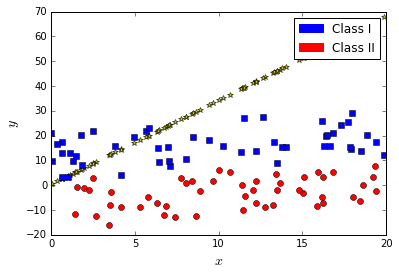

Epoch :2 Error: [ 0.34] Weights:  [[ -8.83304013  71.58246448  -1.6       ]]


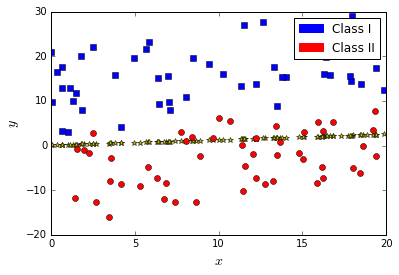

Epoch :3 Error: [ 0.14] Weights:  [[-26.55234012  66.06981817  -3.        ]]


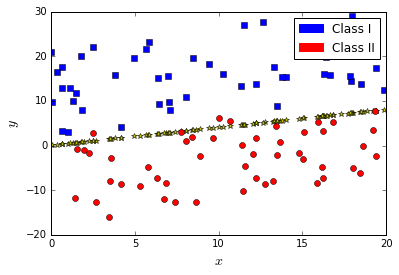

Epoch :4 Error: [ 0.03] Weights:  [[-28.87361182  64.60431596  -3.3       ]]


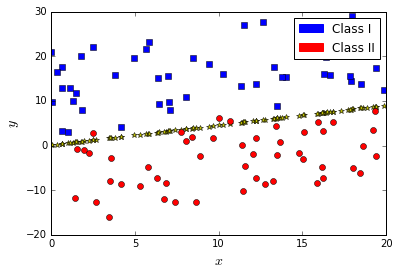

Epoch :5 Error: [ 0.03] Weights:  [[-31.19488353  63.13881374  -3.6       ]]


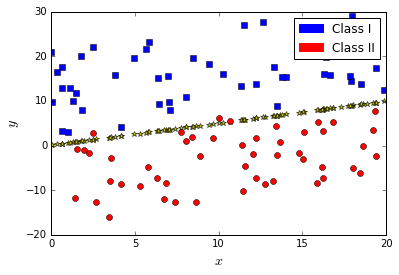

Epoch :6 Error: [ 0.03] Weights:  [[-33.51615523  61.67331153  -3.9       ]]


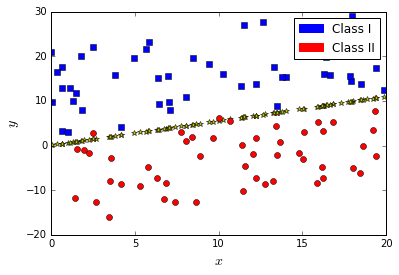

Epoch :7 Error: [ 0.02] Weights:  [[-34.77057329  60.75910446  -4.1       ]]


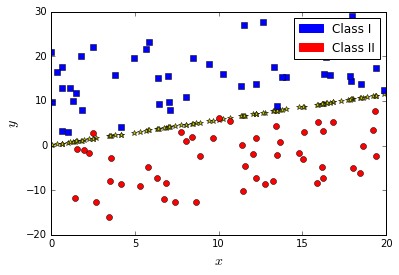

Epoch :8 Error: [ 0.02] Weights:  [[-36.02499136  59.84489739  -4.3       ]]


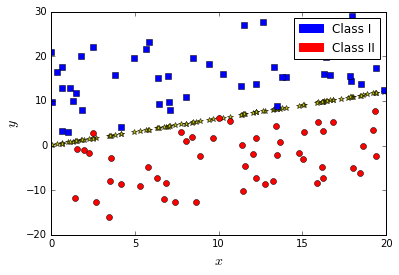

Epoch :9 Error: [ 0.02] Weights:  [[-37.27940942  58.93069031  -4.5       ]]


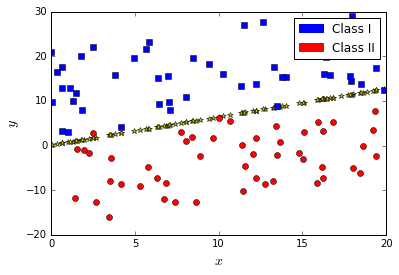

Epoch :10 Error: [ 0.02] Weights:  [[-35.54539118  59.87296371  -4.5       ]]


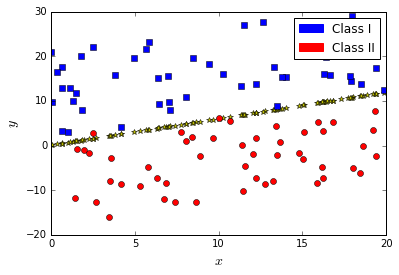

Epoch :11 Error: [ 0.02] Weights:  [[-36.79980925  58.95875664  -4.7       ]]


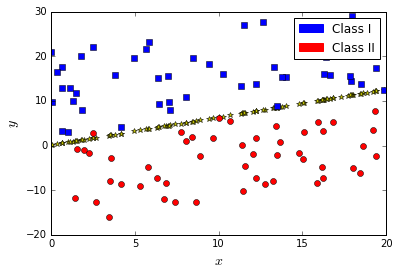

Epoch :12 Error: [ 0.02] Weights:  [[-35.06579101  59.90103004  -4.7       ]]


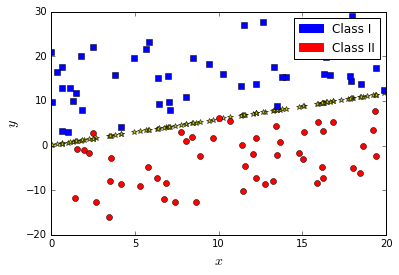

Epoch :13 Error: [ 0.02] Weights:  [[-36.32020907  58.98682296  -4.9       ]]


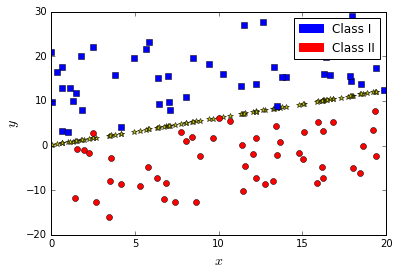

Epoch :14 Error: [ 0.01] Weights:  [[-36.57186216  58.69551827  -5.        ]]


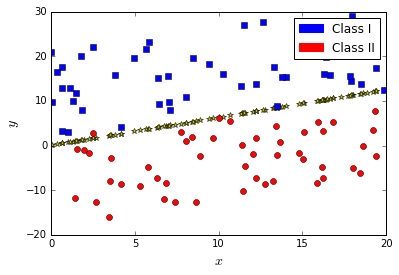

Epoch :15 Error: [ 0.02] Weights:  [[-34.83784392  59.63779167  -5.        ]]


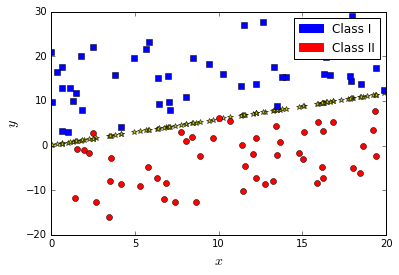

In [316]:
learning_rate = 0.1
number_epochs = 15


my_perceptron_error,my_perceptron_predictions,my_perceptron_weights= LearnPerceptron(x_data, target_class, learning_rate, number_epochs)

Print the prediction given by the Perceptron Model

In [299]:
print(my_perceptron_predictions.transpose())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In the following cell we use define the scikit-learn implementation of the perceptron and learn the model using our dataset.

In [305]:
from sklearn.linear_model import  Perceptron
clf = Perceptron()
clf.fit(x_data, target_class)


/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

## Exercise 2

Use function "PrintDecisionFunction" to visualize the hyperplane learned by the Perceptron model.


Suggestion: Look at the scikit-learn help for the internal parameters of class Perceptron and pass the relevant parameters
to function "PrintDecisionFunction".


[[-11.75845217  57.95393002]] [-9.]


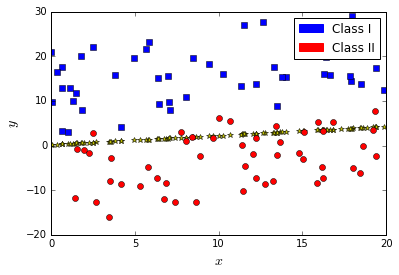

In [307]:
perceptron_fig = PrintDecisionFunction()


## Exercise 3

In this exercise we will use the "Planning Relax Data Set" available from http://archive.ics.uci.edu/ml/datasets/Planning+Relax#
    
    This dataset contains 12 features extracted from the analysis of EEG signals  collected for 5 times on various days from a healthy right-handed subject of 25 years of age.  
    
    The main aim of the data is to classify each instance between normal relaxed state and movement imagery.
    
    This can be seen as a binary classification problem. 
    
    
    1) Create a pipeline that:
    
    1.1) Imputes the data
    
    1.2) Standarize  the data
    
    1.3) Reduces the set of 12 features to only two features by dimensionality reduction.
    
    1.4) Applies a perceptron to classify between the two classes.
    
    2) Evaluate the accuracy of the pipeline using the appropriate function of scikit-learn.
    
    
    3) Print the confusion matrix produced by your pipeline.
    
    
   

In [311]:
# The first 12 columns of the file 'plrx.txt' contains the features and the last column is the class. 

dataset = np.loadtxt('plrx.txt')
dataset.shape

(182, 13)